# Exercise 7 : MazeRunner

---

This notebook covers basic search algorithms for **Path-Finding in a Maze**.       

You will see *uninformed search* algorithms like `breadth_first_search`, `depth_first_search` and `uniform_cost_search`, as well as *informed search* algorithms like `greedy_search` and `astar_search` in action. The setup is a maze with the problem of finding an escape path from the *start* position to the *goal* position on a two-dimensional grid. You will learn how to map a maze (two-dimensional grid) to a graph, and then apply the search algorithms on the graph to solve the problem. Some of the code is provided, while you will have to fill in some on your own. Give it a shot, and have fun!        

**Interactive playground and visualization** for the algorithms are available at this website : https://qiao.github.io/PathFinding.js/visual/

### Exercise Problem

- **Required** : Fill in the missing pieces of code in this Notebook (tagged *MISSING*), and submit the completed Notebook as your solution.       
- **Optional** : Try to attempt the *Experiment and Explore* section at the end of the Notebook, and submit the solutions within this Notebook.       
- **Just for Fun!** : Create a maze based on `KalosMap.jpg` (attached), set *start* and *goal* positions, and try out the path-finding algorithms.    

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library to work with the 2D maze/grid in Python  
> Matplotlib : Primarily for visualization of the 2D maze/grid  
> Seaborn : Mainly for easy maze visualization as heatmap      
> NetworkX : Mainly to visualize the graph representations        
> Queue : Library to work with FIFO, LIFO, Priority queues

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
import networkx as nx
import queue

### Helper functions for the Maze

These are just a few helper functions for you to work with the maze/grid easily, and to visualize them in a nice way. **No need to edit in general.**

In [2]:
# Helper functions to work with the Maze

def printBinaryMaze(mazeGrid):
    ''' Display the maze corresponding to a binary grid
        Input : 2D NumPy array with 0 and 1 as elements
        Output : Simple print of the corresponding maze
    '''
    (height, width) = mazeGrid.shape
    
    print()
    for i in range(height):
        for j in range(width):
            if mazeGrid[i,j] == 1:
                print("\u25a9", end = " ")   # use some other character if the unicode does not print properly
            elif mazeGrid[i,j] == 0:
                print(".", end = " ")
        print()
        

def showBinaryMaze(mazeGrid):
    ''' Display the maze corresponding to a binary grid
        Input : 2D NumPy array with 0 and 1 as elements
        Output : Heatmap grid of the corresponding maze
    '''
    (height, width) = mazeGrid.shape
    mazeGrid = mazeGrid * 255                # just to match standard pixel values (0 to 255) in grayscale
    
    f = plt.figure(figsize = (width,height))
    heatmap(mazeGrid, vmin = 0, vmax = 255, cmap = "Greys", cbar = False)
    
    
def showBinaryMazeProblem(mazeGrid, start, goal):
    ''' Display the maze corresponding to a binary grid
        Display "start" and "goal" position on the grid 
        Input : 2D NumPy array with 0 and 1 as elements
        Input : 2D coordinate of the "start" and "goal"
        Output : Heatmap grid of the maze with markers
    '''
    (height, width) = mazeGrid.shape
    mazeGrid = mazeGrid * 255
    
    mazeGrid[start[0], start[1]] = 128
    mazeGrid[goal[0], goal[1]] = 128
    
    f = plt.figure(figsize = (width,height))
    heatmap(mazeGrid, vmin = 0, vmax = 255, cmap = "Greys", cbar = False)

---
## Create the Maze as a 2D Grid

Let us create the maze as a standard two-dimensional grid, with reachable (blank) and unreachable (blocked) positions.

In [3]:
# Create the Maze
# 0 : empty cell, reachable within a path
# 1 : blocked cell or wall, not reachable

maze = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1],
        [1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


# Convert to a NumPy array
maze = np.array(maze)

# Print the maze using helper functions
print("Maze of dimensions", maze.shape)
printBinaryMaze(maze)

Maze of dimensions (10, 20)

▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ 
▩ . . . ▩ . . . . . . . . . . . . . . ▩ 
▩ . ▩ . ▩ . . . . ▩ . ▩ . ▩ ▩ ▩ ▩ ▩ . ▩ 
▩ . ▩ . ▩ . ▩ ▩ . ▩ . ▩ . . ▩ . . . . ▩ 
▩ . ▩ . . . . ▩ . ▩ . . . . ▩ ▩ ▩ ▩ ▩ ▩ 
▩ . ▩ ▩ ▩ ▩ . ▩ . ▩ . ▩ ▩ . ▩ . . . . . 
▩ . . . . . . ▩ . ▩ . . ▩ . ▩ . ▩ ▩ ▩ ▩ 
▩ . ▩ ▩ ▩ ▩ ▩ ▩ . ▩ ▩ . ▩ ▩ ▩ . . . . ▩ 
▩ . . . . . . . . . ▩ . . . . . . . . ▩ 
▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ 


Display the maze as a Seaborn grayscale heatmap to clearly visualize the pattern and identify the underlying coordinates.

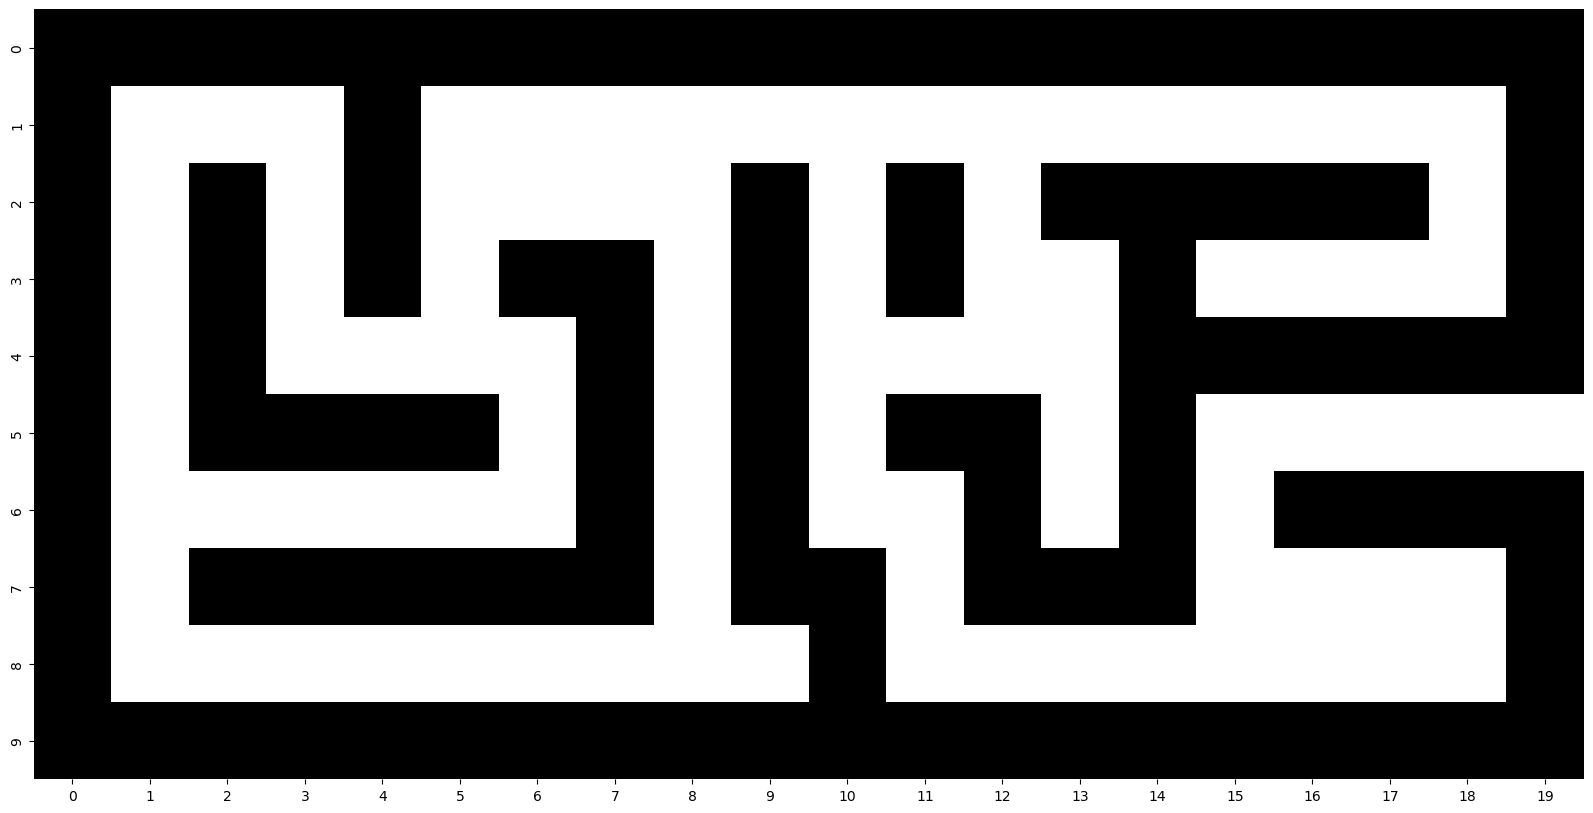

In [4]:
# Show the maze using helper functions
showBinaryMaze(maze)

---
## Path-finding Problem in the Maze

Define the path-finding problem on the maze created above by assigning the *START* and *GOAL* positions as coordinates.

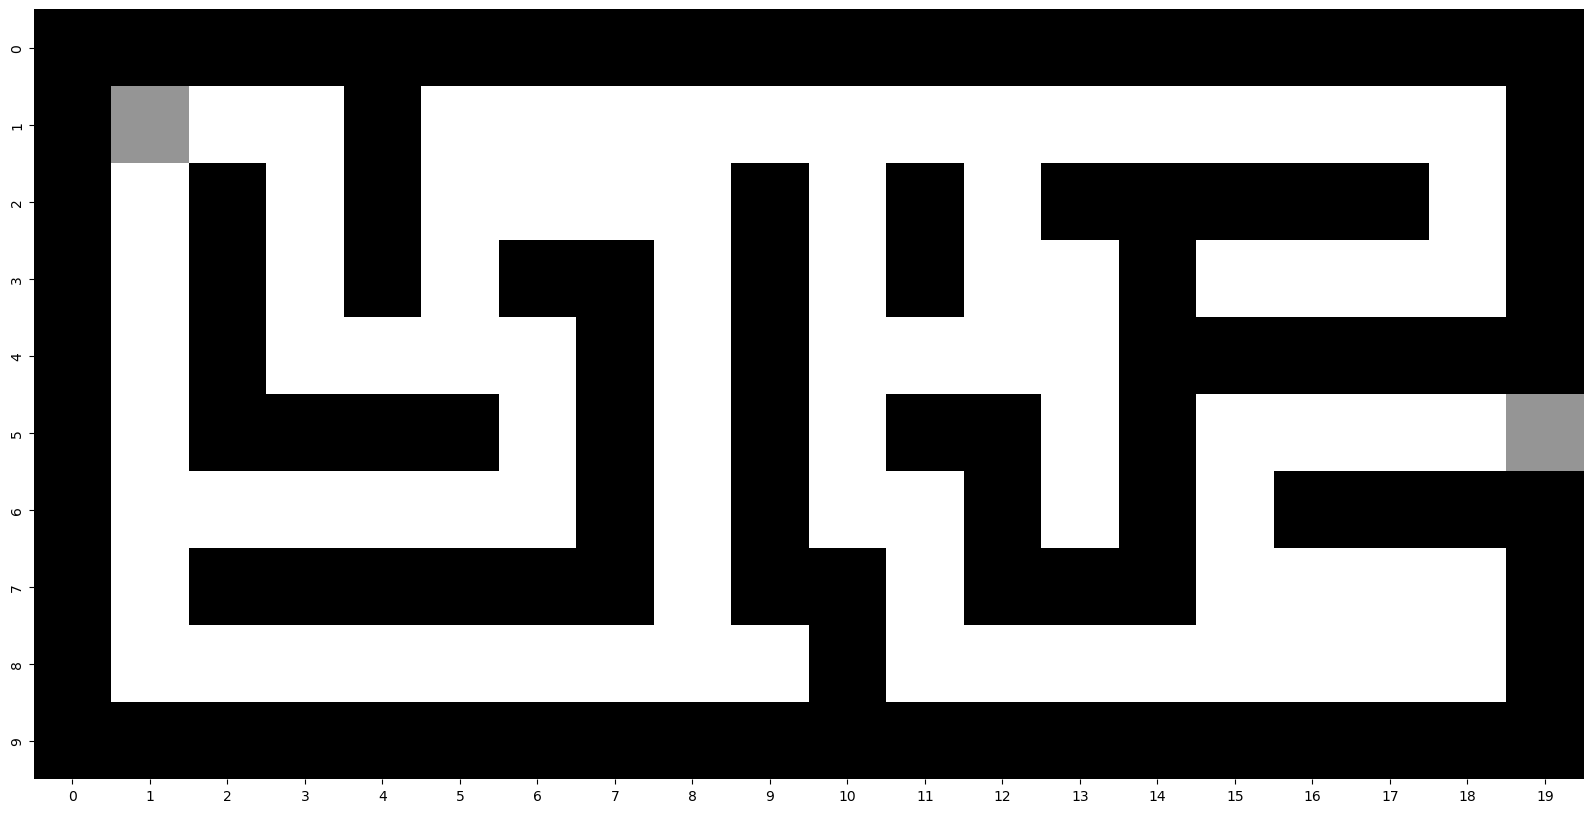

In [5]:
# Define start and goal positions
START = (1,1)
GOAL = (5,19)

# Show the maze using helper functions
showBinaryMazeProblem(maze, START, GOAL)

---
## Extract Graph from the Maze

In order to solve the path-finding problem, we will first extract the *traversal graph* corresponding to the maze. To start with, let's define `MazeGraph`.

In [6]:
# Create a Graph class
class MazeGraph(object):
    ''' Class to represent a Graph
        Construction : Using Edges
    '''
    def __init__(self):
        self.edges = {}
    
    def all_edges(self):
        return self.edges
    
    def neighbors(self, node):
        return self.edges[node]    

### Converting a Maze to a Graph

- The nodes/vertices in the graph are all the blank positions/cells in the maze     
- The blocked positions/cells in the maze are not considered as nodes/vertices
- Each node/vertex is connected to its adjacent blank positions/cells in the maze    
- Each node/vertex is assumed to have 4 adjacent nodes: Top, Left, Bottom, Right     
- Default weight for each such edge in the graph between two adjacent vertices is 1     
- We are assuming that diagonal traversal from one cell to another is not permitted    

In [7]:
# Function to convert a maze to a graph
def maze_to_graph(mazeGrid):
    ''' Converts a 2D binary maze to corresponding graph
        Input : 2D NumPy array with 0 and 1 as elements
        Output : MazeGraph corresponding to input maze
    '''
    mazeGraph = MazeGraph()
    (height, width) = mazeGrid.shape
    
    for i in range(height):
        for j in range(width):
            
            # Only consider blank cells as nodes
            if mazeGrid[i,j] == 0:
                
                neighbors = []
                
                # Adjacent cell : Top
                if (i > 0) and mazeGrid[i-1,j] == 0:
                    neighbors.append(((i-1,j), 1))
                    
                # Adjacent cell : Left                
                if (j > 0) and mazeGrid[i,j-1] == 0:
                    neighbors.append(((i,j-1), 1))
                    
                # Adjacent cell : Bottom                    
                if (i < height - 1) and mazeGrid[i+1,j] == 0:
                    neighbors.append(((i+1,j), 1))

                # Adjacent cell : Right                    
                if (j < width - 1) and mazeGrid[i,j+1] == 0:
                    neighbors.append(((i,j+1), 1))

                # Insert edges in the graph
                if len(neighbors) > 0:
                    mazeGraph.edges[(i,j)] = neighbors

    return mazeGraph

In [8]:
# Convert the maze to a graph
mazegraph = maze_to_graph(maze)

# Print the edges with weights
mazegraph.all_edges()

{(1, 1): [((2, 1), 1), ((1, 2), 1)],
 (1, 2): [((1, 1), 1), ((1, 3), 1)],
 (1, 3): [((1, 2), 1), ((2, 3), 1)],
 (1, 5): [((2, 5), 1), ((1, 6), 1)],
 (1, 6): [((1, 5), 1), ((2, 6), 1), ((1, 7), 1)],
 (1, 7): [((1, 6), 1), ((2, 7), 1), ((1, 8), 1)],
 (1, 8): [((1, 7), 1), ((2, 8), 1), ((1, 9), 1)],
 (1, 9): [((1, 8), 1), ((1, 10), 1)],
 (1, 10): [((1, 9), 1), ((2, 10), 1), ((1, 11), 1)],
 (1, 11): [((1, 10), 1), ((1, 12), 1)],
 (1, 12): [((1, 11), 1), ((2, 12), 1), ((1, 13), 1)],
 (1, 13): [((1, 12), 1), ((1, 14), 1)],
 (1, 14): [((1, 13), 1), ((1, 15), 1)],
 (1, 15): [((1, 14), 1), ((1, 16), 1)],
 (1, 16): [((1, 15), 1), ((1, 17), 1)],
 (1, 17): [((1, 16), 1), ((1, 18), 1)],
 (1, 18): [((1, 17), 1), ((2, 18), 1)],
 (2, 1): [((1, 1), 1), ((3, 1), 1)],
 (2, 3): [((1, 3), 1), ((3, 3), 1)],
 (2, 5): [((1, 5), 1), ((3, 5), 1), ((2, 6), 1)],
 (2, 6): [((1, 6), 1), ((2, 5), 1), ((2, 7), 1)],
 (2, 7): [((1, 7), 1), ((2, 6), 1), ((2, 8), 1)],
 (2, 8): [((1, 8), 1), ((2, 7), 1), ((3, 8), 1)],
 (2

### Displaying the Maze Graph

**This is optional.** Just a helper function to display the graph using NetworkX. You may examine the graph node-by-node is you wish.

In [9]:
# Helper functions to display a Graph

def showBinaryMazeGraph(mazeGraph):
    ''' Display a graph using networkx
        Input : MazeGraph from 2D maze
        Output : Input graph displayed
    '''
    edgeDict = mazeGraph.all_edges()
    edgeList = []
    for node in edgeDict:
        for neighbor, weight in edgeDict[node]:
            edgeList.append((node,neighbor, {'weight': weight}))

    G = nx.Graph()
    G.add_edges_from(edgeList)

    f = plt.figure(figsize = (40,40))
    pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size = 2000)
    nx.draw_networkx_edges(G, pos, width = 2)
    nx.draw_networkx_labels(G, pos, font_size = 10)

    plt.axis("off")
    plt.show()

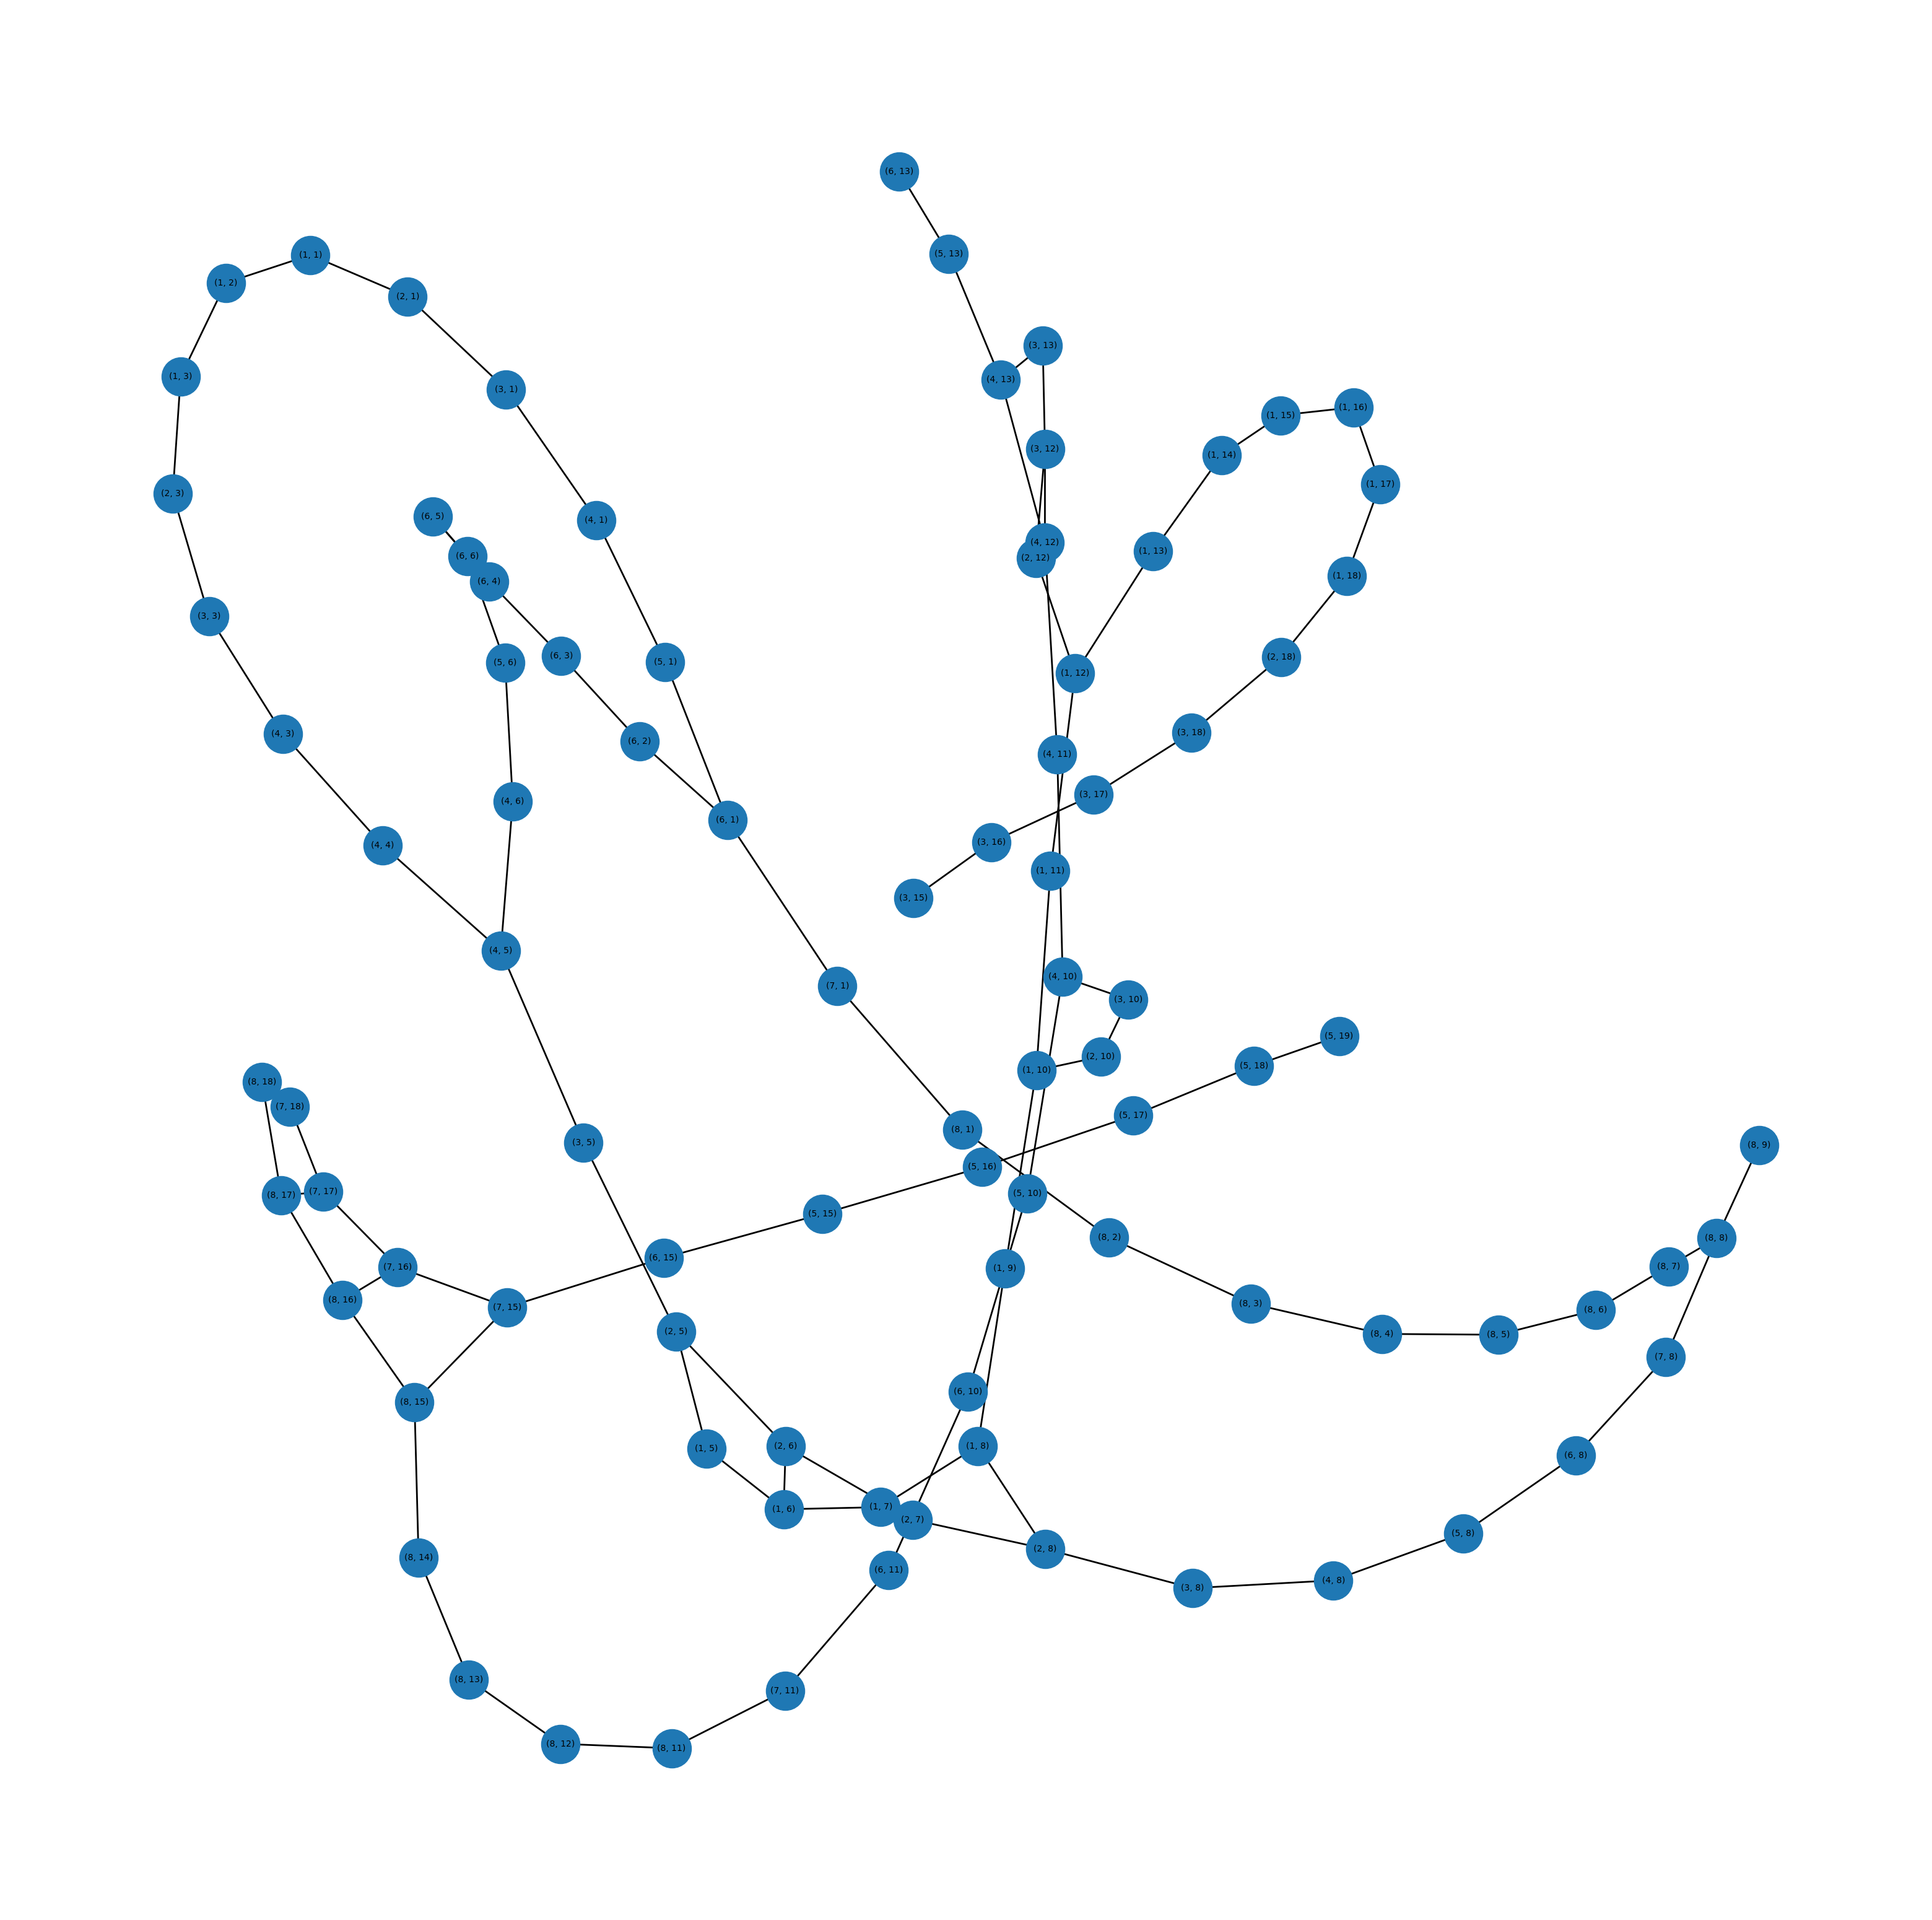

In [10]:
# Show the graph using helper functions
# The layout may change every time you run this cell
# However, the graph (nodes, edges) remains the same

showBinaryMazeGraph(mazegraph)

---
## Path Finding on the Graph

Now that we have the *traversal graph* corresponding to the maze, we may try out various path-finding search algorithms on the graph.

In [11]:
# Helper functions to work with the Maze with Path

def showBinaryMazePath(mazeGrid, mazePath):
    ''' Display the maze corresponding to a binary grid
        Display path(s) superimposed on the binary grid 
        Input : 2D NumPy array with 0 and 1 as elements
        Input : 2D coordinates of the paths on the maze
        Output : Heatmap grid of the maze with the path
    '''
    (height, width) = mazeGrid.shape
    mazeGrid = mazeGrid * 255                # just to match standard pixel values (0 to 255) in grayscale
    
    for node in mazePath:
        mazeGrid[node[0], node[1]] = 128     # half level of grayscale (0 to 255) to highlight the path
    
    f = plt.figure(figsize = (width,height))
    heatmap(mazeGrid, vmin = 0, vmax = 255, cmap = "Greys", cbar = False)

### Breadth-First-Search (BFS)

**Uninformed Search** : Focusses on the graph structure and not the *cost from start* or *distance from goal*.

In [12]:
# Breadth-First-Search (BFS) with FIFO Queue

def breadth_first_search(mazeGraph, start, goal):
    ''' Function to perform BFS to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.Queue()    # FIFO Queue for Frontier
    
    # initialization
    frontier.put(start)         # Add the start node to frontier
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    processed = 0               # Count of total nodes processed
    
    while not frontier.empty():
        # get next node from frontier
        currentNode = frontier.get()
        processed += 1
        
        # stop when goal is reached
        if currentNode == goal:
            break
        
        # explore every single neighbor of current node
        for nextNode, weight in mazeGraph.neighbors(currentNode):
           
            # ignore if it has already been explored
            if nextNode not in explored:
                
                # put new node in frontier
                frontier.put(nextNode)
                
                # assign current node as parent
                explored[nextNode] = currentNode
    
    return explored, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

92
Breadth-First-Search (BFS)

Total nodes in maze : 92
Total nodes visited : 92  |  100.0 %
Final path distance : 35

Path through the Maze : [(1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (4, 4), (4, 5), (3, 5), (2, 5), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (2, 10), (3, 10), (4, 10), (5, 10), (6, 10), (6, 11), (7, 11), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (7, 15), (6, 15), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19)]


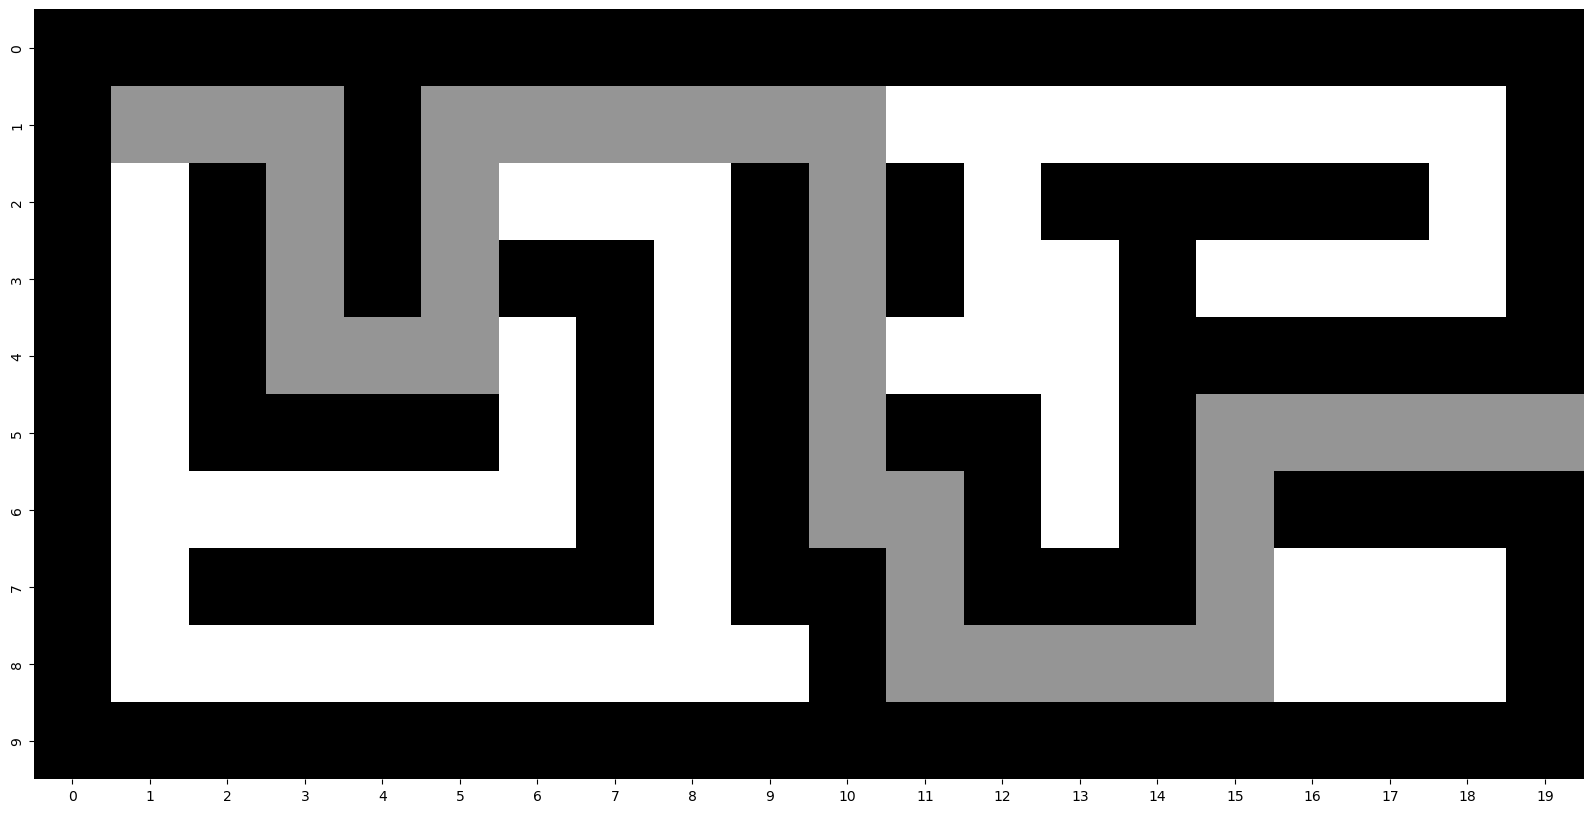

In [13]:
# Define start and goal positions
START = (1,1)
GOAL = (5,19)

# Run the BFS algorithm for path finding
nodesExplored, nodesProcessed = breadth_first_search(mazegraph, start = START, goal = GOAL)
print(len(nodesExplored))
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("Breadth-First-Search (BFS)")
print()

totalNodes = np.count_nonzero(maze == 0)
print("Total nodes in maze :", totalNodes)
print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
print("Final path distance :", len(path))
print()

# Print the path and show using helper functions
print("Path through the Maze :", path)
showBinaryMazePath(maze,path)

**Think about it!**

Is this algorithm *complete*? Is it *optimal*? What can you do to increase its *efficiency*?

This algorithm is complete and optimal but not very efficient. This algorithm is uses a very naive approach where we make use of a queue structure to explore all the neighbours of every node first, before moving on to the neighbours of the neighbours. By adding each neighbour into a queue we are guranteeing that we visit all the unexpanded nodes at the current depth first, before exploring nodes at a deeper depth. "because it always expands the shallowest unexpanded node". This means that if there is a path to the goal, we will neccessarily find it because of this exhaustive approach by checking every single possible path.
This shows its completeness.
We are also "searching radially" outwards from the root. Which also means that if we find the goal along any path, it is necessary the shortest path. Can think of it as: we have explored every single possible shortest path radially out from the root, TO ANY LOCATION IN THE WORLD. This means if any of those locations is the goal it is the shortest one.
This shows its optimality.

It is not very efficient since it checks every single neighbour of any node, even those nodes that might potentially get it further away from the goal. It has no heuristics or estimation to guide it. Thus it will potentially and often times check every single node in the whole graph, although not always. It can exit early as well if the goal is met before hand. Average case is quite bad although best case is good.

### Depth-First-Search (DFS)

**Uninformed Search** : Focusses on the graph structure and not the *cost from start* or *distance from goal*.

In [14]:
# Sort of a naive approach

# Depth-First-Search (DFS) with _??_ Queue

def depth_first_search(mazeGraph, start, goal):
    ''' Function to perform DFS to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.LifoQueue()      # _??_ Queue for Frontier
    
    # initialization
    frontier.put(start)         # Add the start node to frontier
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    processed = 0               # Count of total nodes processed
    
    while not frontier.empty():
        # Write the entire logic for this search algorithm
        # Hint : Take note from the BFS algorithm presented above
        currentNode = frontier.get()
        processed += 1
        
        # stop when goal is reached
        if currentNode == goal:
            break
        # explore every single neighbor of current node
        for nextNode, weight in mazeGraph.neighbors(currentNode):
           
            # ignore if it has already been explored
            if nextNode not in explored:
                
                # put new node in frontier
                frontier.put(nextNode)
                
                # assign current node as parent
                explored[nextNode] = currentNode
    
    
    return explored, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

Depth-First-Search (DFS)

Total nodes in maze : 92
Total nodes visited : 85  |  92.39 %
Final path distance : 57

Path through the Maze : [(1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (4, 4), (4, 5), (4, 6), (5, 6), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (6, 1), (7, 1), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (7, 8), (6, 8), (5, 8), (4, 8), (3, 8), (2, 8), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (2, 12), (3, 12), (4, 12), (4, 11), (4, 10), (5, 10), (6, 10), (6, 11), (7, 11), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (7, 15), (6, 15), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19)]


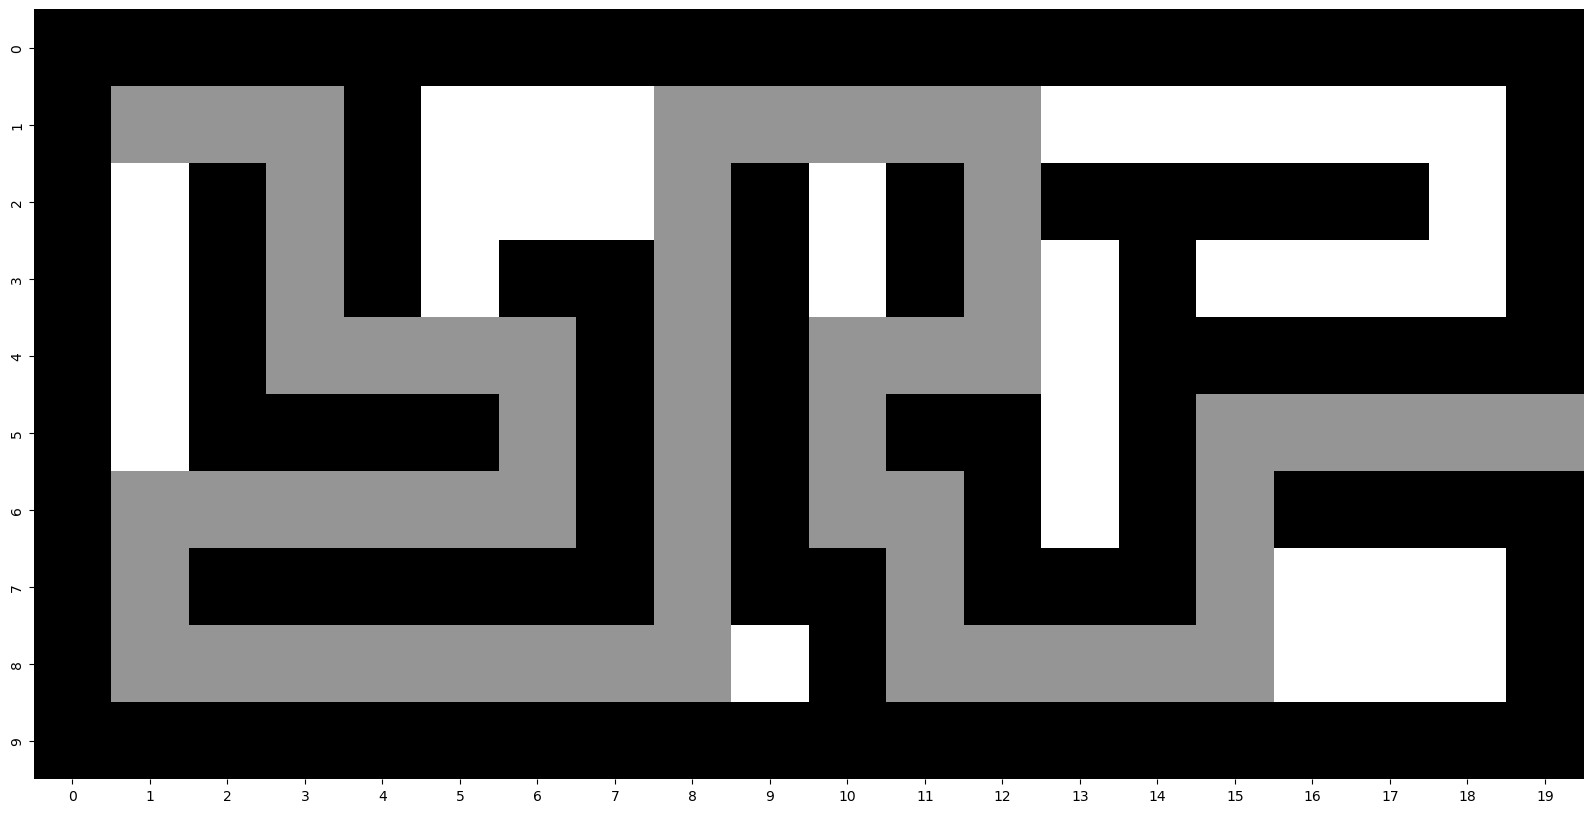

In [15]:
# Define start and goal positions
START = (1,1)
GOAL = (5,19)

# Run the DFS algorithm for path finding
nodesExplored, nodesProcessed = depth_first_search(mazegraph, start = START, goal = GOAL)
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("Depth-First-Search (DFS)")
print()

totalNodes = np.count_nonzero(maze == 0)
print("Total nodes in maze :", totalNodes)
print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
print("Final path distance :", len(path))
print()

# Print the path and show using helper functions
print("Path through the Maze :", path)
showBinaryMazePath(maze,path)

**Think about it!**

Is this algorithm *complete*? Is it *optimal*? What can you do to increase its *efficiency*?

This algorithm is complete(if there are no "roundabouts" in the maze/graph) but not optimal, but it is more efficient that breadth first search IN THE SEARCHING PROCESS. This algorithm is uses a very naive approach where we make use of a stack structure to follow any path we see all the way, only backtracking if a dead end is hit. We explore all the neighbours of the neighbours of the neighbours of the neighbours first, essentially following any possible path all the way.

By adding each neighbour into a stack with a LIFO structure, we visit each path completely. If we find the goal then we alr have a path to the goal. If we hit a dead end we will backtrack one node at a time, slowly popping nodes of the stack until we reach a node that has unexplored options, then we follow that alternative path all the way. That is how backtracking is naturally implemented with a stack.

Since we are repeatedly backtracking until we find the goal, if a path to the goal exists we will neccessarily find it, if it means visiting every single node. This shows its completeness. 

Furthermore if we find a path, the SEARCH process is often more efficient than BFS, since we have to visit less nodes on average to find the path.

However since we are following a single path all the way that leads to the goal, we might miss out on shorter paths since we might have taken a longer path by chance and we would have no way of knowing if a shorter path exists since our only condition for backtracking is hitting dead end.

This shows its sub-optimality.

### Uniform-Cost-Search (UCS)

**Uninformed Search** : Focusses on the graph structure and the *cost from start*, but not the *distance from goal*.

In [16]:
# Uniform-Cost-Search (UCS) with Priority Queue

def uniform_cost_search(mazeGraph, start, goal):
    ''' Function to perform UCS to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.PriorityQueue()      # Priority Queue for Frontier
    
    # initialization
    frontier.put((0, start))    # Add the start node to frontier with priority 0
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    pathcost = {}               # Dict of cost from start to node
    pathcost[start] = 0         # start to start cost should be 0
    processed = 0               # Count of total nodes processed
    
    while not frontier.empty():
        # get next node from frontier
        currentNode = frontier.get()[1]
        processed += 1
        
        # stop when goal is reached
        if currentNode == goal:
            break
        
        # explore every single neighbor of current node
        for nextNode, weight in mazeGraph.neighbors(currentNode):
            
            # compute the new cost for the node based on the current node
            #cost of that new node is the cost of the current node + the weight ie the cost to get from this current node to that new node
            # since there is a path from currentnode to that new node, as indicated by mazeGraph, which stores all the edges of every node
            newcost = pathcost[currentNode] + weight

            # consider if not yet explored or if the new cost is lower 
            if (nextNode not in explored) or (newcost < pathcost[nextNode]):

                # set priority as newcost 
                priority = newcost
                
                # put new node in frontier with priority
                frontier.put((priority, nextNode))
                
                # assign current node as parent
                explored[nextNode] = currentNode
                
                # keep track of the updated path cost
                pathcost[nextNode] = newcost
    
    return explored, pathcost, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

Uniform-Cost-Search (UCS)

Total nodes in maze : 92
Total nodes visited : 92  |  100.0 %
Final path distance : 35

Path through the Maze : [(1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (4, 4), (4, 5), (3, 5), (2, 5), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (2, 10), (3, 10), (4, 10), (5, 10), (6, 10), (6, 11), (7, 11), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (7, 15), (6, 15), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19)]


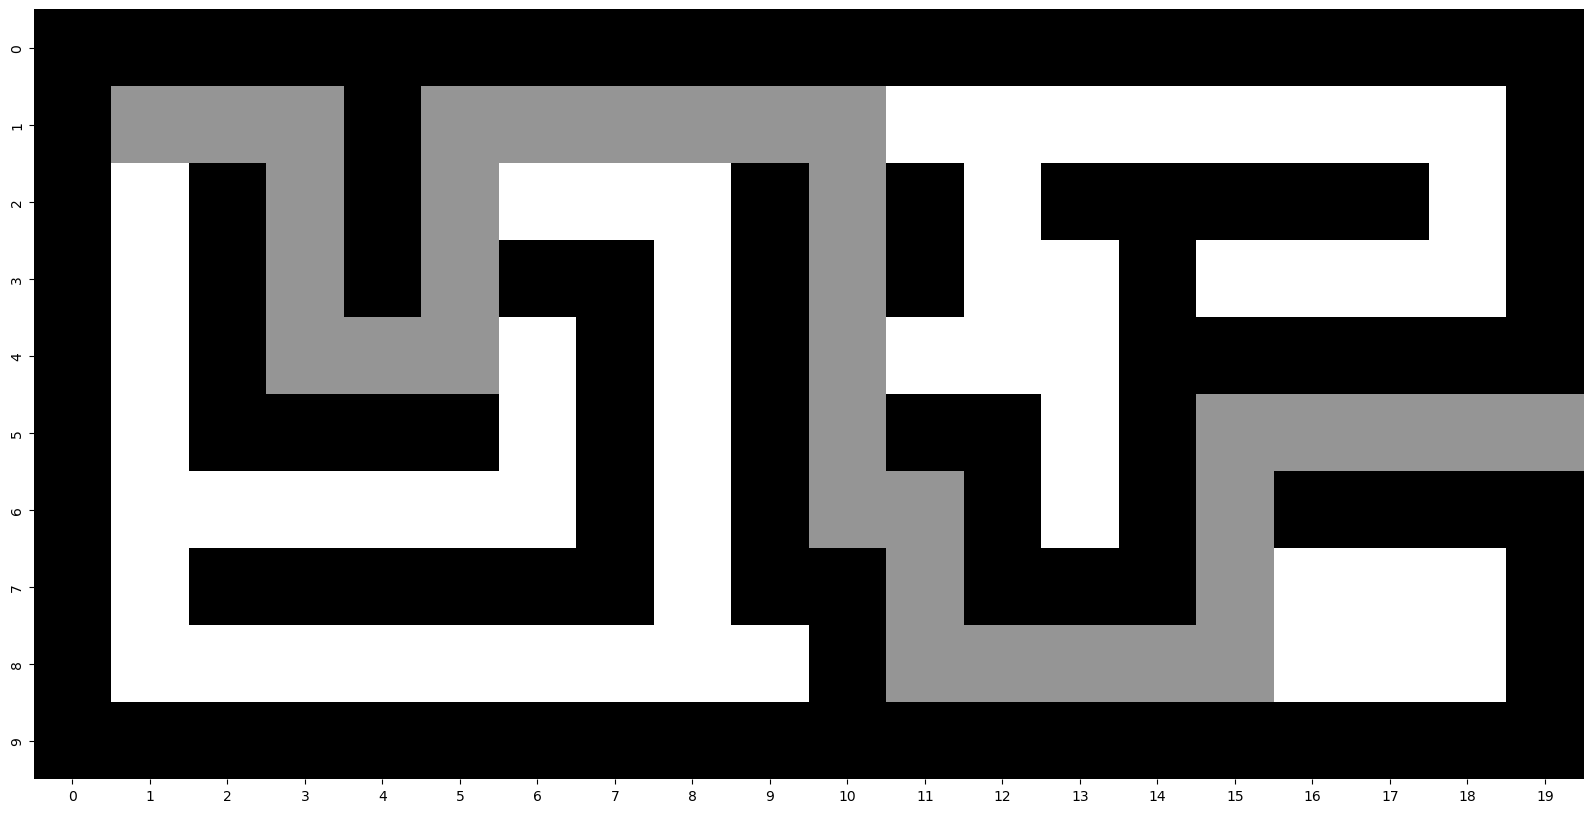

In [17]:
# Define start and goal positions
START = (1,1)
GOAL = (5,19)

# Run the UCS algorithm for path finding
nodesExplored, pathsExplored, nodesProcessed = uniform_cost_search(mazegraph, start = START, goal = GOAL)
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("Uniform-Cost-Search (UCS)")
print()

totalNodes = np.count_nonzero(maze == 0)
print("Total nodes in maze :", totalNodes)
print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
print("Final path distance :", len(path))
print()

# Print the path and show using helper functions
print("Path through the Maze :", path)
showBinaryMazePath(maze,path)

**Think about it!**

Is this algorithm *complete*? Is it *optimal*? What can you do to increase its *efficiency*?

This algorithm is complete and optimal but not very efficient, although slightly more efficient than BFS. This algorithm is essentially BFS but takes into account different weights or costs to travel along edges, ie not all path costs are 1. Every node keep tracks of not only whether it has been visited, but also how far it is from the start/root. For every node, the cost of visiting each of its neighbours is the cost it took to visit this current node from the root + the weight between this current node and the neighbour. It then stores this info for each of its neighbours. It uses a smarter approach where we make use of a sorted list to prioritise visiting any node in the whole graph with lowest cost first. The next node should be the node w the lowest cost, among all unexplored nodes in queue, IE the node we certainly know takes the least cost to get to from the current node.

Unlike BFS it does not guarantee that all neighbours of a node will be visited first, it simply visits the least cost node in the whole graph next. That is what the sorted nature of a priority queue can give us. If during exploration it discovers a previously visited node but through this current path, that previously visited node would have a lower cost, it updates the cost of that previously visited node and alters the link such that the previously visited node will now be going through here. Thus each node will always store the least cost to get there from the start/root.

This does not change the fundamental way search is carried out, it is still fundamentally the same as BFS, there is no guarantee that visiting the next node w the lowest cost will get us any closer to finding the path to the goal. This means that this process is still exhaustive like BFS and if there is a path to the goal, we will neccessarily find it because of this exhaustive approach by checking every single possible path if needed.
This shows its completeness. 

Because we are constantly updating the shortest path to any node as we go, we guarantee that any partial path we have will be the optimal path to that arbitrary node. Since we always visit the unexplored node with the lowest cost, if there were a shorter path to that arbitrary node, we would have explored it first.Thus when we find the goal along any path, it is necessary the shortest path. 
This shows its optimality.

As mentioned, priority queue does not guarantee more efficient search, we are simply hoping to find the path to the goal without exploring as many nodes as BFS. The worse case is still same as BFS which is every single node (100% of nodes). However the average case is better than BFS, since we only visit the node w least cost in the frontier and we are getting to nodes w greater depth quicker, ie making depth progress quicker than BFS, thus on average we will find the path to the goal quicker, by not visiting nodes with very high costs, since that is more *unlikely* going to lead to our goal.

But Dijkstra's search or UCS still does not have any sort of heuristic or any knowledge of the right direction to look, and that is why the worse case is still exhaustive as BFS, which is also why this is equivalent to BFS when the graph is unweighted, or when every node has the same weight of 1.

From StackOverFlow:
Dijkstra's Algorithm finds the shortest path from the root node to every other node. uniform cost searches for shortest paths in terms of cost from the root node to a goal node. Uniform Cost Search is Dijkstra's Algorithm which is focused on finding a single shortest path to a single finishing point rather than the shortest path to every point.

UCS does this by stopping as soon as the finishing point is found. For Dijkstra, there is no goal state and processing continues until all nodes have been removed from the priority queue, i.e. until shortest paths to all nodes (not just a goal node) have been determined.

UCS has fewer space requirements, where the priority queue is filled gradually as opposed to Dijkstra's, which adds all nodes to the queue on start with an infinite cost.

As a result of the above points, Dijkstra is more time consuming than UCS

UCS is usually formulated on trees while Dijkstra is used on general graphs

Djikstra is only applicable in explicit graphs where the entire graph is given as input. UCS starts with the source vertex and gradually traverses the necessary parts of the graph. Therefore, it is applicable for both explicit graphs and implicit graphs (where states/nodes are generated).

### Greedy-Search (GS)

**Informed Search** : Focusses on the graph structure and the *distance from goal*, but not the *cost from start*.

In [18]:
# This cell has MISSING pieces of code -- fill those in!

# Heuristic function for Distance

def heuristic(nodeA, nodeB):
    (xA, yA) = nodeA
    (xB, yB) = nodeB
    return abs(xA - xB) + abs(yA - yB)


# Greedy-Search (GS) with _??_ Queue

def greedy_search(mazeGraph, start, goal):
    ''' Function to perform GS to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.PriorityQueue()    # _??_ Queue for Frontier
    
    # initialization
    frontier.put((0, start))    # Add the start node to frontier with priority 0
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    pathcost = {}               # Dict of cost from start to node
    pathcost[start] = 0         # start to start cost should be 0
    processed = 0               # Count of total nodes processed
    
    while not frontier.empty():
        # Write the entire logic for this search algorithm
        # Hint : Take note from the UCS algorithm presented above
        # get next node from frontier
        currentNode = frontier.get()[1]
        processed += 1
        
        # stop when goal is reached
        if currentNode == goal:
            break
        
        # explore every single neighbor of current node
        for nextNode, weight in mazeGraph.neighbors(currentNode):
            
            # compute the new cost for the node based on the current node
            newcost = heuristic(goal,nextNode)

            # consider if not yet explored or if the new cost is lower 
            if (nextNode not in explored):

                # set priority as newcost 
                priority = newcost
                
                # put new node in frontier with priority
                frontier.put((priority, nextNode))
                
                # assign current node as parent
                explored[nextNode] = currentNode
                
                # keep track of the updated path cost
                pathcost[nextNode] = newcost
        
    
    return explored, pathcost, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

Greedy-Search (GS)

Total nodes in maze : 92
Total nodes visited : 67  |  72.83 %
Final path distance : 39

Path through the Maze : [(1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (4, 4), (4, 5), (3, 5), (2, 5), (2, 6), (2, 7), (2, 8), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (2, 12), (3, 12), (4, 12), (4, 11), (4, 10), (5, 10), (6, 10), (6, 11), (7, 11), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (7, 15), (6, 15), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19)]


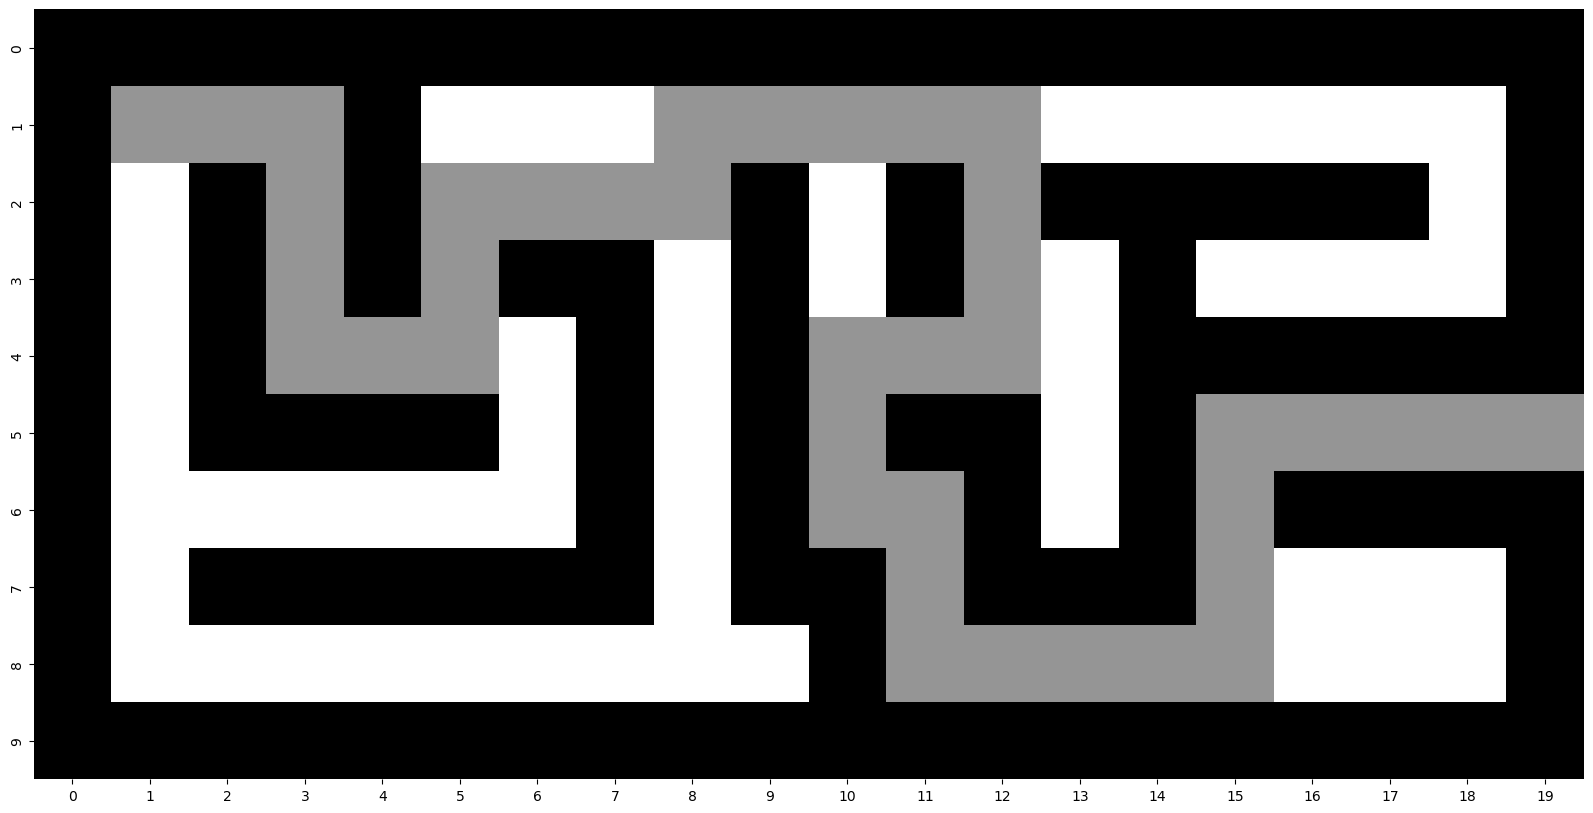

In [19]:
# Define start and goal positions
START = (1,1)
GOAL = (5,19)

# Run the GS algorithm for path finding
nodesExplored, pathsExplored, nodesProcessed = greedy_search(mazegraph, start = START, goal = GOAL)
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("Greedy-Search (GS)")
print()

totalNodes = np.count_nonzero(maze == 0)
print("Total nodes in maze :", totalNodes)
print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
print("Final path distance :", len(path))
print()

# Print the path and show using helper functions
print("Path through the Maze :", path)
showBinaryMazePath(maze,path)

**Think about it!**

Is this algorithm *complete*? Is it *optimal*? What can you do to increase its *efficiency*?

This algorithm is not complete and not optimal but more efficient on avg case, than BFS, UCS, DFS. This algorithm has no memory of previous state, and does not take into account the weights or costs of travelling along each node. It simply stores the heuristic of each node as its cost(in this case its the euclidian distance between the node and the goal).

For every node, the cost of visiting each of its neighbours is the heuristic. It then stores this info for each of its neighbours. It also makes use of a sorted list to prioritise visiting any node in the whole graph with lowest cost first. The next node should be the node w the lowest cost, among all unexplored nodes in queue, IE the node we certainly know takes the least cost to get to from the current node.

At every node it will only select its best option available at that current moment, without consideration of overall result or past decisions. The heuristic is a very useful way of getting an estimate to how far each node is from the final goal, and it usually measures either euclidean distance or mahattan distance, which provides the algorithm some sort of direction to search. It is a forward looking property. With this heuristic the algorithm will never visit nodes that take it further away from the goal, thus this ensures progress is being made for majority of the time. This means greedy search will always try to get closer to the goal at every node.

However there is a chance of an infinite loop happening, in the case when there are 2 nodes which are both very close to the goal in their own cluster, far closer than any other nodes, which means both of them have the lowest heuristic from each others perspective. This results in the algorithm alternating between the 2 nodes forever, since to the alogorithm the other one is always the one with the lowest heuristic. This leads to an infinite loop and the path will not be found.
Since the path to the goal cannot be guaranteed by this algorithm in all scenarios, it is not complete.

If it is not complete it cannot be optimal.

However if it does find a path, regardless of whether it is optimal or not, it often would have done it in a much shorter time than BFS,DFS or UCS. Greedy is more efficient during the SEARCHING PROCESS than the other 3 since it visits the least number of nodes to find the path, due to the heuristic it is able to have a sense of direction relative to the end goal.


### A\*-Search (A\*S)

**Informed Search** : Focusses on the graph structure, the *cost from start* and also the *distance from goal*.

In [22]:
# This cell has MISSING pieces of code -- fill those in!

# Heuristic function for Distance

def heuristic(nodeA, nodeB):
    (xA, yA) = nodeA
    (xB, yB) = nodeB
    return abs(xA - xB) + abs(yA - yB)


# A*-Search (A*S) with Priority Queue

def astar_search(mazeGraph, start, goal):
    ''' Function to perform A*S to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.PriorityQueue()      # Priority Queue for Frontier
    
    # initialization
    frontier.put((0, start))    # Add the start node to frontier with priority 0
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    pathcost = {}               # Dict of cost from start to node, DOES NOT INCLUDE THE HEURISTIC
    pathcost[start] = 0         # start to start cost should be 0
    processed = 0               # Count of total nodes processed
    
    while not frontier.empty():
        # Write the entire logic for this search algorithm
        # Hint : Take note from the UCS algorithm presented above
        currentNode = frontier.get()[1]
        processed += 1
        
        # stop when goal is reached
        if currentNode == goal:
            break
        
        # explore every single neighbor of current node
        for nextNode, weight in mazeGraph.neighbors(currentNode):
            
            # compute the new cost for the node based on the current node
            #cannot add the heuristic here, not because heuristic is not impt, but because of that comparison of with previously visited distances
            # the total cost of a node is its heuristic(distance left to goal) + path cost from root to that node
            #the additon of the heuristic is only in the priority queue where the nodes are sorted based on the pathcosts and the heuristic to the end
            # the previous nodes heuristic is not added into this calculation, else A* wont work since all the heuristics of prev nodes would all bubble up as we go and the priority queue would not work
            # thus pathcost cannot contain the heuristic of the current node added in
            #which is why we only add it when before we push it to the priority queue
            newcost = pathcost[currentNode] + weight

            # consider if not yet explored or if the new cost is lower 
            if (nextNode not in explored) or (newcost < pathcost[nextNode]):

                # set priority as newcost 
                priority = newcost+ heuristic(nextNode,goal)

                # put new node in frontier with priority
                frontier.put((priority, nextNode))
                
                # assign current node as parent
                explored[nextNode] = currentNode
                
                # keep track of the updated path cost
                pathcost[nextNode] = newcost
        
    
    return explored, pathcost, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

A*-Search (A*S)

Total nodes in maze : 92
Total nodes visited : 87  |  94.57 %
Final path distance : 35

Path through the Maze : [(1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (4, 4), (4, 5), (3, 5), (2, 5), (2, 6), (2, 7), (2, 8), (1, 8), (1, 9), (1, 10), (2, 10), (3, 10), (4, 10), (5, 10), (6, 10), (6, 11), (7, 11), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (7, 15), (6, 15), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19)]


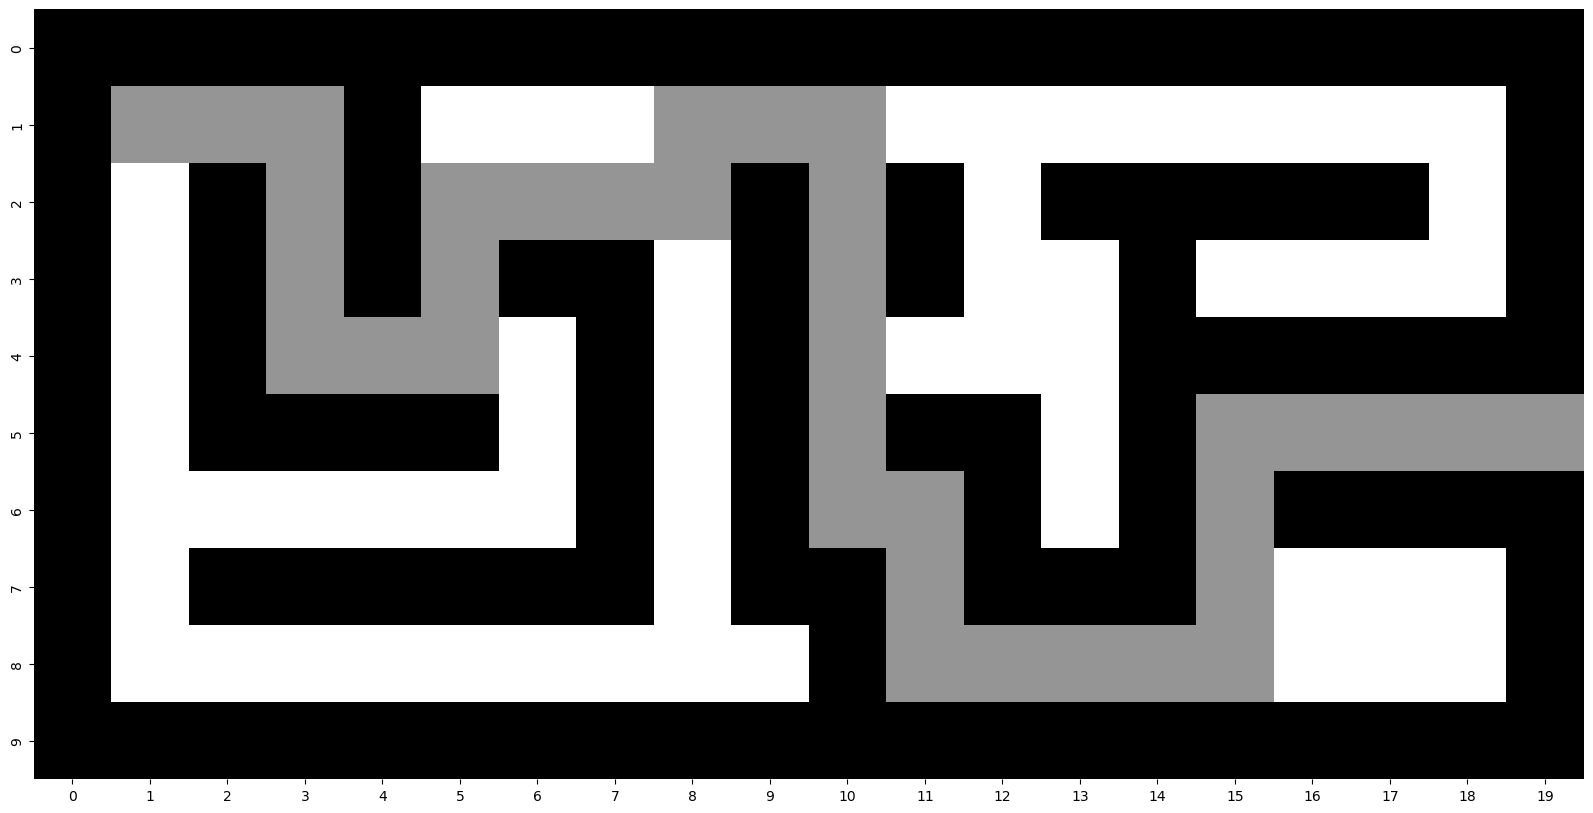

In [23]:
# Define start and goal positions
START = (1,1)
GOAL = (5,19)

# Run the A*S algorithm for path finding
nodesExplored, pathsExplored, nodesProcessed = astar_search(mazegraph, start = START, goal = GOAL)
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("A*-Search (A*S)")
print()

totalNodes = np.count_nonzero(maze == 0)
print("Total nodes in maze :", totalNodes)
print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
print("Final path distance :", len(path))
print()

# Print the path and show using helper functions
print("Path through the Maze :", path)
showBinaryMazePath(maze,path)

**Think about it!**

Is this algorithm *complete*? Is it *optimal*? What can you do to increase its *efficiency*?

This algorithm is complete, optimal and more efficient than DFS,BFS,UCS on average, but less efficient than greedy. It is a combination of UCS and greedy. It combines the ability to keep track of previous progress as well as the least costs of every node in a partial path, and the forward-looking heuristic and sense of direction of greedy search.

Every node keep tracks of not only whether it has been visited, but also how far it is from the start/root + an estimate of how far isit from the goal. For every node, the cost of visiting each of its neighbours is the path cost it took to visit this current node from the root + the weight between this current node and the neighbour + heruristic to the goal(how far more it has to go). 

**Note this sum does not include the heuristic of the node it came from, only the path cost from the root note. Heuristic is individual to each node and not part of the path length, its only added for consideration in the priority queue, which takes into account g(n) + h(n). If all the heuristics of previous nodes are continually added,A* wont work since all the heuristics of prev nodes would all bubble up as we go. This is different from Dijkstra/UCS which only had path cost as its total cost.**

It then stores this info for each of its neighbours. It uses a sorted list to prioritise visiting any node in the whole graph with lowest cost first. The next node should be the node w the lowest cost, among all unexplored nodes in queue, IE the node we certainly know takes the least cost to get to from the current node.

Unlike BFS it does not guarantee that all neighbours of a node will be visited first, it simply visits the least cost node in the whole graph next. That is what the sorted nature of a priority queue can give us. If during exploration it discovers a previously visited node but through this current path, that previously visited node would have a lower cost, it updates the cost of that previously visited node and alters the link such that the previously visited node will now be going through here. Thus each node will always store the least cost to get there from the start/root.

This search is still exhaustive in a way that in the worse case it will still search all nodes and if there is a path to the goal, we will neccessarily find it because of this exhaustive approach by checking every single possible path if needed.
This shows its completeness. 

Because we are constantly updating the shortest path to any node as we go, we guarantee that any partial path we have will be the optimal path to that arbitrary node. Since we always visit the unexplored node with the lowest cost, if there were a shorter path to that arbitrary node, we would have explored it first.Thus when we find the goal along any path, it is necessary the shortest path. 
This shows its optimality.

However it is different from UCS in that it combines use of heuristic to sort and rank the nodes to decide which to visit next. This means that a node with a short path cost but is further away from the goal will get penalized and will have lower priority. It will not waste time looking at nodes that bring it further away from the goal. This ensures the algorithm will always be making progress closer to the goal, and in the most efficient way too, since at each node, it is basically choosing a very accurate next node, the node which has least path cost and gets us roughly nearer to the goal(in the right direction). This results in the theoretical best way of traversing through a graph, which is why its A*. And on average, with a good and accurate heuristic, the average case is much more better and more efficient than UCS, DFS,BFS as it expands radially like UCS and BFS, but with a direction. Worse case is still 100% of nodes same as UCS. However it is not as efficient as greedy search since it visits more nodes than greedy search.

---
## Experiment and Explore (optional)

Play around with the algorithms and their variations at this amazing website : https://qiao.github.io/PathFinding.js/visual/

Let us consider the *efficiency* of an algorithm as the %-age of nodes it has to explore to find the path. Lower the better.

1. Try to redefine the maze (change the initial binary matrix) so that BFS and DFS find the same path. Which one is more efficient?       
2. Try to redefine the maze (change the initial binary matrix) so that UCS and BFS find the same path, but UCS is more efficient than BFS.         
3. Try to redefine the maze (change the initial binary matrix) so that UCS and GS find the same path. Which one is more efficient?       
4. Try to redefine the maze (change the initial binary matrix) so that GS and A\*S find the same path. Which one is more efficient?       
5. Try to redefine the heuristic (Manhattan, Euclidean or Chebyshev distance) in case of GS and A\*S. What changes do you see?       